# HOMEWORK 1

### Matthew Pergolski | IST 652

Matthew_Pergolski_Homework_1

### Structured Data Processing

In [79]:
# Import necessary packages

import pandas as pd
import numpy as np
import seaborn as sb
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

In [80]:
# Choose to read data into a data frame as opposed to an array or list/list of dictionaries/etc. -- data frames seem more practical in the 'real world' (my personal view)

df = pd.read_csv('/Users/pergolicious/Library/CloudStorage/OneDrive-SyracuseUniversity/Syracuse University/Courses/IST 652/Files/donors_data.csv')

df = df.drop(columns=['Row Id', 'Row Id.', 'zipconvert_2', 'zipconvert_3', 'zipconvert_4', 'zipconvert_5', 'IC15', 'TARGET_B', 'TARGET_D'], axis = 1)

# The .info() method allows the programmer to see a nice, detailed summary of the data, what it is, and what it's constructed of.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120 entries, 0 to 3119
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   homeowner dummy  3120 non-null   int64  
 1   NUMCHLD          3120 non-null   int64  
 2   INCOME           3120 non-null   int64  
 3   gender dummy     3120 non-null   int64  
 4   WEALTH           3120 non-null   int64  
 5   HV               3120 non-null   int64  
 6   Icmed            3120 non-null   int64  
 7   Icavg            3120 non-null   int64  
 8   NUMPROM          3120 non-null   int64  
 9   RAMNTALL         3120 non-null   float64
 10  MAXRAMNT         3120 non-null   float64
 11  LASTGIFT         3120 non-null   float64
 12  totalmonths      3120 non-null   int64  
 13  TIMELAG          3120 non-null   int64  
 14  AVGGIFT          3120 non-null   float64
dtypes: float64(4), int64(11)
memory usage: 365.8 KB


In [81]:
# Show a statistical summary of the data
df.describe()

,homeowner dummy,NUMCHLD,INCOME,gender dummy,WEALTH,HV,Icmed,Icavg,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT
count,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000
mean,0.770192,1.069231,3.893910,0.609295,6.402244,1141.361859,388.217308,432.088141,49.089423,110.399875,16.651397,13.522917,31.136859,6.861859,10.690713
std,0.420777,0.347688,1.636186,0.487987,2.539978,946.642162,172.815950,168.195104,22.717130,147.299933,22.223521,10.581439,4.132952,5.561209,7.443980
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,15.000000,5.000000,0.000000,17.000000,0.000000,2.138889
25%,1.000000,1.000000,3.000000,0.000000,5.000000,556.000000,278.000000,318.000000,29.000000,45.000000,10.000000,7.000000,29.000000,3.000000,6.356092
50%,1.000000,1.000000,4.000000,1.000000,8.000000,822.000000,356.000000,396.000000,48.000000,81.000000,15.000000,10.000000,31.000000,5.000000,9.000000
75%,1.000000,1.000000,5.000000,1.000000,8.000000,1338.750000,465.000000,516.000000,65.000000,134.625000,20.000000,16.000000,34.000000,9.000000,12.811652
max,1.000000,5.000000,7.000000,1.000000,9.000000,5945.000000,1500.000000,1331.000000,157.000000,5674.900000,1000.000000,219.000000,37.000000,77.000000,122.166667


In [82]:
# Show a preview of the data
df.head()

,homeowner dummy,NUMCHLD,INCOME,gender dummy,WEALTH,HV,Icmed,Icavg,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT
0,1,1,5,1,9,1399,637,703,74,102.0,6.0,5.0,29,3,4.857143
1,1,1,1,0,7,698,422,463,46,94.0,12.0,12.0,34,6,9.400000
2,0,2,5,1,8,828,358,376,32,30.0,10.0,5.0,29,7,4.285714
3,1,1,3,0,4,1471,484,546,94,177.0,10.0,8.0,30,3,7.080000
4,1,1,4,0,8,547,386,432,20,23.0,11.0,11.0,30,6,7.666667


### Data

In [83]:
#check for missing values
df.isnull().sum

# print(count_nan[count_nan == True])

<bound method NDFrame._add_numeric_operations.<locals>.sum of       homeowner dummy  NUMCHLD  INCOME  gender dummy  WEALTH     HV  Icmed  \
0               False    False   False         False   False  False  False   
1               False    False   False         False   False  False  False   
2               False    False   False         False   False  False  False   
3               False    False   False         False   False  False  False   
4               False    False   False         False   False  False  False   
...               ...      ...     ...           ...     ...    ...    ...   
3115            False    False   False         False   False  False  False   
3116            False    False   False         False   False  False  False   
3117            False    False   False         False   False  False  False   
3118            False    False   False         False   False  False  False   
3119            False    False   False         False   False  False  False   

 

In [84]:
df['homeowner dummy'].value_counts()

1    2403
0     717
Name: homeowner dummy, dtype: int64

In [85]:
print(df['NUMCHLD'].value_counts())
print(df['INCOME'].value_counts())
print(df['WEALTH'].value_counts())

df = pd.get_dummies(df, columns = ['NUMCHLD', 'INCOME', 'WEALTH'], drop_first = True)

df.info()

1    2972
2      99
3      31
4      17
5       1
Name: NUMCHLD, dtype: int64
4    1053
5     535
2     468
3     296
1     282
6     246
7     240
Name: INCOME, dtype: int64
8    1700
9     189
5     186
7     180
6     162
3     162
4     153
2     138
1     138
0     112
Name: WEALTH, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120 entries, 0 to 3119
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   homeowner dummy  3120 non-null   int64  
 1   gender dummy     3120 non-null   int64  
 2   HV               3120 non-null   int64  
 3   Icmed            3120 non-null   int64  
 4   Icavg            3120 non-null   int64  
 5   NUMPROM          3120 non-null   int64  
 6   RAMNTALL         3120 non-null   float64
 7   MAXRAMNT         3120 non-null   float64
 8   LASTGIFT         3120 non-null   float64
 9   totalmonths      3120 non-null   int64  
 10  TIMELAG          3120 non-null   i

In [86]:
numeric_cols = ['HV', 'Icmed', 'Icavg', 'NUMPROM', 'RAMNTALL', 'MAXRAMNT', 'LASTGIFT', 'totalmonths', 'TIMELAG', 'AVGGIFT']
cat_cols = list(set(df.columns) - set(numeric_cols) - {'homeowner dummy'})
cat_cols.sort()
cat_cols

['INCOME_2',
 'INCOME_3',
 'INCOME_4',
 'INCOME_5',
 'INCOME_6',
 'INCOME_7',
 'NUMCHLD_2',
 'NUMCHLD_3',
 'NUMCHLD_4',
 'NUMCHLD_5',
 'WEALTH_1',
 'WEALTH_2',
 'WEALTH_3',
 'WEALTH_4',
 'WEALTH_5',
 'WEALTH_6',
 'WEALTH_7',
 'WEALTH_8',
 'WEALTH_9',
 'gender dummy']

In [87]:
random_seed = 12

df_train, df_test = train_test_split(df, test_size = 0.2, random_state = random_seed, stratify = df['homeowner dummy'])


print(df_train.shape)
print(df_test.shape)
print('---------------------------')
print(df_train['homeowner dummy'].value_counts(normalize = True))
print('---------------------------')
print(df_test['homeowner dummy'].value_counts(normalize = True))

(2496, 31)
(624, 31)
---------------------------
1    0.770032
0    0.229968
Name: homeowner dummy, dtype: float64
---------------------------
1    0.770833
0    0.229167
Name: homeowner dummy, dtype: float64


In [88]:
scaler = StandardScaler()
scaler.fit(df_train[numeric_cols])

def get_features_and_target_arrays(df, numeric_cols, cat_cols, scaler):
    X_numeric_scaled = scaler.transform(df[numeric_cols])
    X_categorical = df[cat_cols].to_numpy()
    X = np.hstack((X_categorical, X_numeric_scaled))
    y = df['homeowner dummy']
    return X, y

X, y = get_features_and_target_arrays(df_train, numeric_cols, cat_cols, scaler)

In [89]:
LogisticRegression(C=1.0, class_weight=None, 
                   dual=False, 
                   fit_intercept=True, 
                   intercept_scaling=1, 
                   l1_ratio=None, max_iter=100, 
                   multi_class='auto', 
                   n_jobs=None, 
                   penalty='none', 
                   random_state=None, 
                   solver='lbfgs', tol=0.0001, 
                   verbose=0, 
                   warm_start=False)

LogisticRegression(penalty='none')

In [90]:
X_test, y_test = get_features_and_target_arrays(df_test, numeric_cols, cat_cols, scaler)

/Users/pergolicious/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


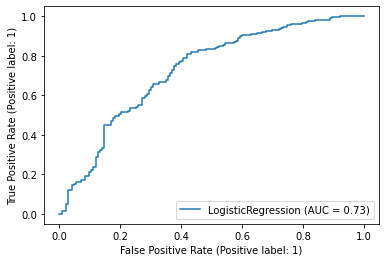

In [91]:
plot_roc_curve(clf, X_test, y_test)

/Users/pergolicious/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


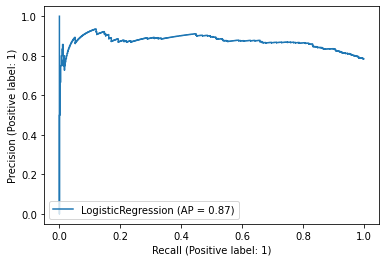

In [92]:
plot_precision_recall_curve(clf, X_test, y_test)

In [93]:
test_prob = clf.predict_proba(X_test)[:, 1]
test_pred = clf.predict(X_test)

In [94]:
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report')
print(classification_report(y_test, test_pred))

Log loss = 0.49039
AUC = 0.72673
Average Precision = 0.87107

Using 0.5 as threshold:
Accuracy = 0.78686
Precision = 0.81408
Recall = 0.93763
F1 score = 0.87150

Classification Report
              precision    recall  f1-score   support

           0       0.57      0.28      0.38       143
           1       0.81      0.94      0.87       481

    accuracy                           0.79       624
   macro avg       0.69      0.61      0.62       624
weighted avg       0.76      0.79      0.76       624



Confusion Matrix


/Users/pergolicious/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


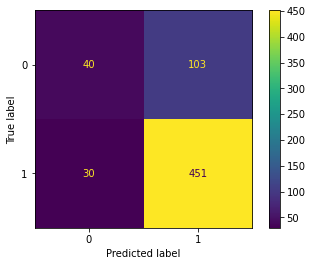

In [95]:
print('Confusion Matrix')
plot_confusion_matrix(clf, X_test, y_test)

In [96]:
coefficients = np.hstack((clf.intercept_, clf.coef_[0]))
pd.DataFrame(data={'variable': ['intercept'] + cat_cols + numeric_cols, 'coefficient': coefficients})

,variable,coefficient
0,intercept,-0.708120
1,INCOME_2,0.649933
2,INCOME_3,0.858189
3,INCOME_4,3.125633
4,INCOME_5,1.643428
5,INCOME_6,1.988852
6,INCOME_7,2.707497
7,NUMCHLD_2,0.929463
8,NUMCHLD_3,0.690178
9,NUMCHLD_4,-0.379452


In [97]:
pd.DataFrame(data={'variable': numeric_cols, 'unit': np.sqrt(scaler.var_)})

,variable,unit
0,HV,941.738387
1,Icmed,170.243754
2,Icavg,166.976610
3,NUMPROM,22.770785
4,RAMNTALL,98.574412
5,MAXRAMNT,12.132310
6,LASTGIFT,10.703841
7,totalmonths,4.199681
8,TIMELAG,5.314535
9,AVGGIFT,7.315894


In [98]:
exp(0.345501)

NameError: name 'exp' is not defined